In [5]:
import pandas as pd

# 데이터 로드
file_path = 'C:\\Users\\Admin\\Documents\\GitHub\\sg_2cha\\sy\\data\\E-commerce_ref.csv'  # 파일 경로를 지정하세요
data = pd.read_csv(file_path)

# 데이터 구조 확인
print("데이터셋 구조:")
print(data.info())

# 데이터 샘플 확인
print("\n데이터 샘플:")
print(data.head())

# 데이터의 크기 확인
print("\n데이터 크기 (행, 열):", data.shape)


데이터셋 구조:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5379 entries, 0 to 5378
Data columns (total 20 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   고객 ID    5379 non-null   int64  
 1   이탈 여부    5379 non-null   int64  
 2   가입 기간    5379 non-null   float64
 3   접속 기기    5379 non-null   object 
 4   도시 등급    5379 non-null   int64  
 5   배송거리     5379 non-null   float64
 6   결제 방식    5379 non-null   object 
 7   성별       5379 non-null   object 
 8   앱 사용 시간  5379 non-null   float64
 9   기기 수     5379 non-null   float64
 10  주문 카테고리  5379 non-null   object 
 11  만족도      5379 non-null   int64  
 12  결혼 여부    5379 non-null   object 
 13  주소 수     5379 non-null   int64  
 14  불만족 여부   5379 non-null   int64  
 15  주문 증가율   5379 non-null   float64
 16  쿠폰 수     5379 non-null   float64
 17  주문 횟수    5379 non-null   float64
 18  경과일      5379 non-null   float64
 19  캐시백 금액   5379 non-null   float64
dtypes: float64(9), int64(6), object(5)
memory u

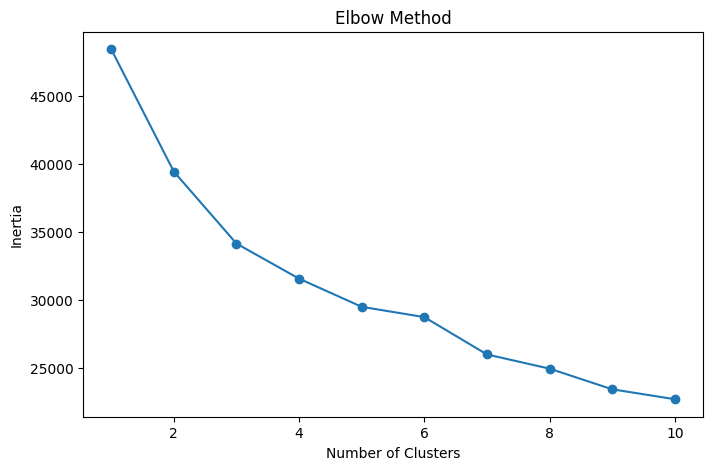


=== 클러스터별 요약 ===


TypeError: agg function failed [how->mean,dtype->object]

In [8]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 데이터 로드
# data = pd.read_csv('eng_E-commerce_ref.csv')  # 파일 경로를 지정하세요

# 2. 필요한 변수 선택 및 전처리
# 예시: 고객 ID, 구매 데이터(총 구매액, 주문 횟수, 평균 구매액), 만족도 등
features = ['주문 횟수', '주문 증가율', '쿠폰 수', '캐시백 금액', '만족도','이탈 여부','배송거리','경과일','가입 기간']
clustering_data = data[features]

# 결측치 처리
clustering_data = clustering_data.fillna(clustering_data.median())

# 데이터 스케일링 (표준화)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(clustering_data)

# 3. 최적의 클러스터 개수 찾기 (Elbow Method)
inertia = []
range_clusters = range(1, 11)

for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Elbow Method 시각화
plt.figure(figsize=(8, 5))
plt.plot(range_clusters, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# 4. K-Means 클러스터링 (최적의 클러스터 수 선택)
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)
clusters = kmeans.fit_predict(scaled_data)
data['Cluster'] = clusters

# 클러스터 결과를 데이터에 추가
data['Cluster'] = clusters

# 5. 클러스터별 분석
print("\n=== 클러스터별 요약 ===")
print(data.groupby('Cluster').mean())

# 6. 클러스터 시각화 (2차원 PCA 변환 후)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)
data['PCA1'] = pca_data[:, 0]
data['PCA2'] = pca_data[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='PCA1', y='PCA2', hue='Cluster', data=data, palette='viridis', s=100
)
plt.title('Customer Segmentation (K-Means)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Cluster')
plt.show()

# 7. 클러스터별 구매 카테고리 분석
if '주문 카테고리' in data.columns:
    category_analysis = data.groupby(['Cluster', '주문 카테고리']).size().unstack().fillna(0)
    print("\n=== 클러스터별 구매 카테고리 분석 ===")
    print(category_analysis)

    # 카테고리 분석 시각화
    category_analysis.plot(kind='bar', stacked=True, figsize=(12, 6))
    plt.title('Cluster-wise Product Category Analysis')
    plt.xlabel('Cluster')
    plt.ylabel('Number of Purchases')
    plt.legend(title='Product Category')
    plt.show()
else:
    print("데이터에 '주문 카테고리' 컬럼이 없습니다.")

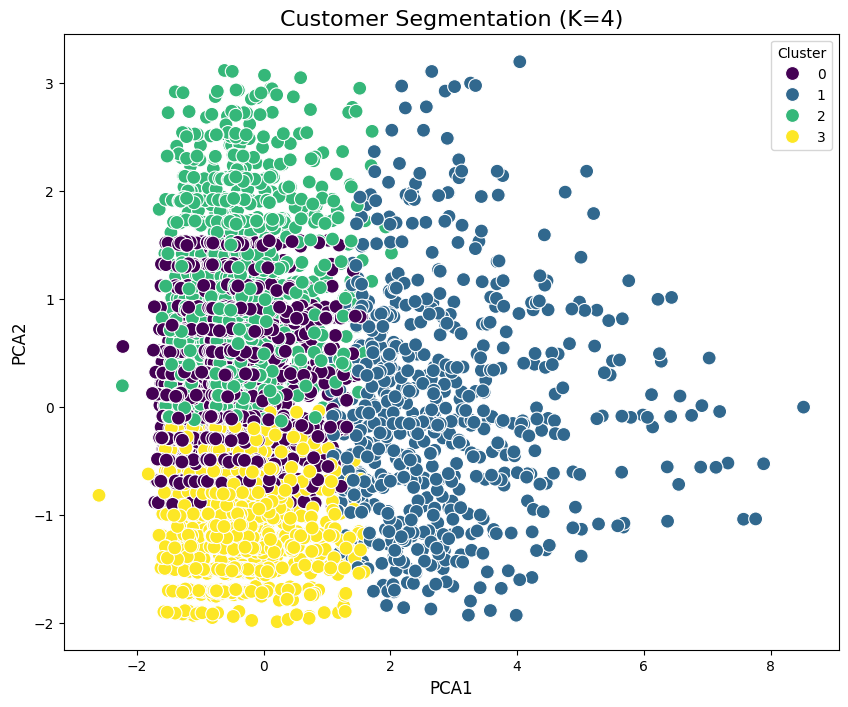

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 데이터 전처리 (표준화)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[features])  # features는 분석할 변수 리스트

# K-Means 클러스터링 (K=4)
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(scaled_data)
data['Cluster'] = clusters

# PCA 변환 (2차원 시각화를 위해)
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)
data['PCA1'] = pca_data[:, 0]
data['PCA2'] = pca_data[:, 1]

# 클러스터 시각화
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='PCA1', y='PCA2', hue='Cluster', data=data, palette='viridis', s=100
)
plt.title('Customer Segmentation (K=4)', fontsize=16)
plt.xlabel('PCA1', fontsize=12)
plt.ylabel('PCA2', fontsize=12)
plt.legend(title='Cluster')
plt.show()


일부 영역에서 클러스터 간 경계가 겹치는 것은 특정 변수들 간의 차별성이 부족한 결과일 수 있습니다.


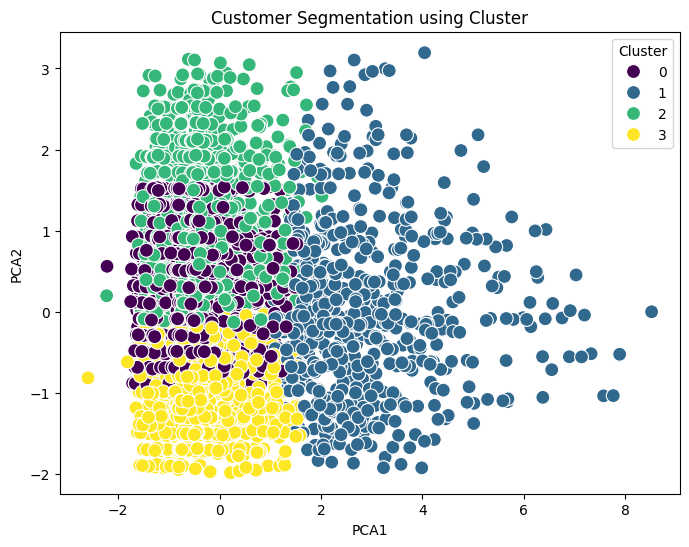

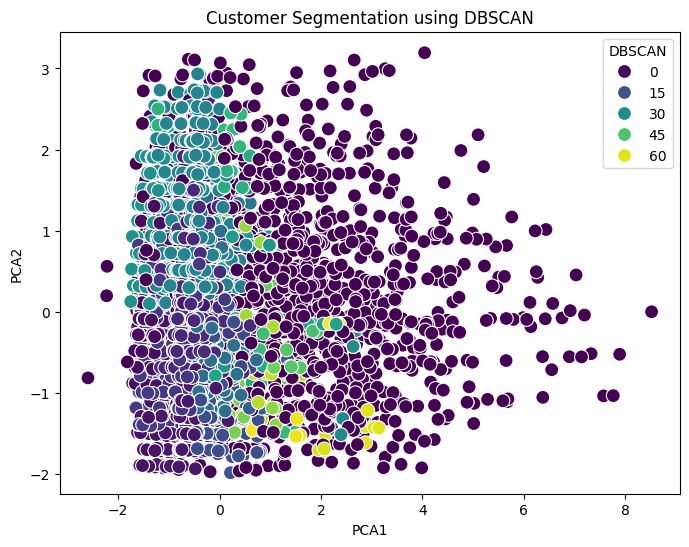

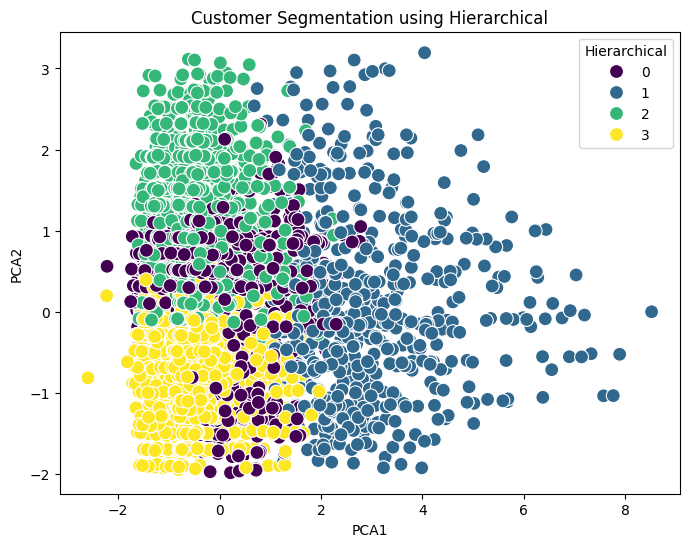

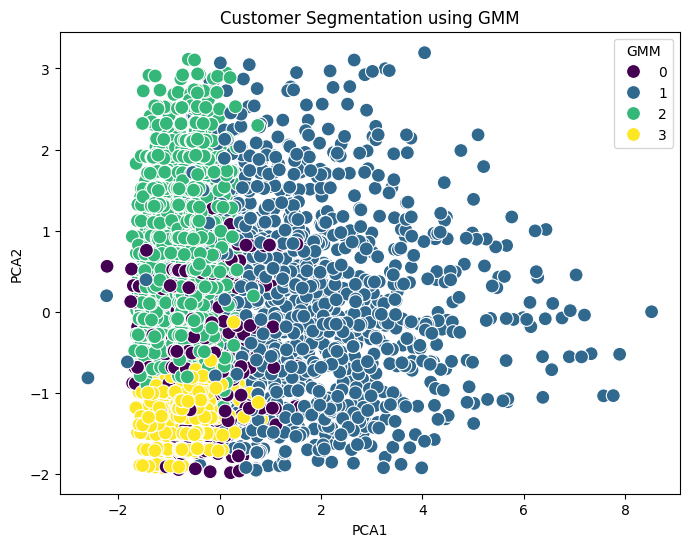

In [7]:
from sklearn.cluster import DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture

# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
data['DBSCAN'] = dbscan.fit_predict(scaled_data)

# Hierarchical Clustering
agg = AgglomerativeClustering(n_clusters=4)
data['Hierarchical'] = agg.fit_predict(scaled_data)

# Gaussian Mixture Model
gmm = GaussianMixture(n_components=4, random_state=42)
data['GMM'] = gmm.fit_predict(scaled_data)

# 시각화
for method in ['Cluster', 'DBSCAN', 'Hierarchical', 'GMM']:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='PCA1', y='PCA2', hue=method, data=data, palette='viridis', s=100)
    plt.title(f'Customer Segmentation using {method}')
    plt.xlabel('PCA1')
    plt.ylabel('PCA2')
    plt.legend(title=method)
    plt.show()
